# Topology optimization

In [1]:
import math
import matplotlib.pyplot as plt

from loads import HalfBeam
from fesolvers import LilFESolver, CooFESolver
from topopt import Topopt

In [2]:
%matplotlib inline

In [3]:
# material properties
young = 1
poisson = 0.3

# default input parameters
nelx = 180
nely = 60
volfrac = 0.4
penal = 3.0
rmin = 5.4
delta = 0.01
loopy = math.inf

# loading/problem
load = HalfBeam(nelx, nely)

# optimizer
verbose = False
fesolver = CooFESolver(verbose = verbose)
optimizer = Topopt(fesolver, young, poisson, verbose = verbose)

In [4]:
# compute
x = optimizer.init(load, volfrac)
x, loop = optimizer.layout(load, x, volfrac, penal, rmin, delta, loopy)

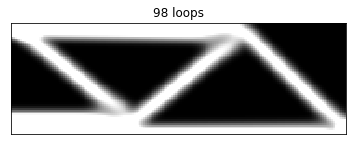

In [5]:
# plot
plt.figure()
plt.imshow(x, cmap=plt.cm.gray)
plt.title(str(loop) + ' loops')
plt.xticks([])
plt.yticks([])
plt.show()